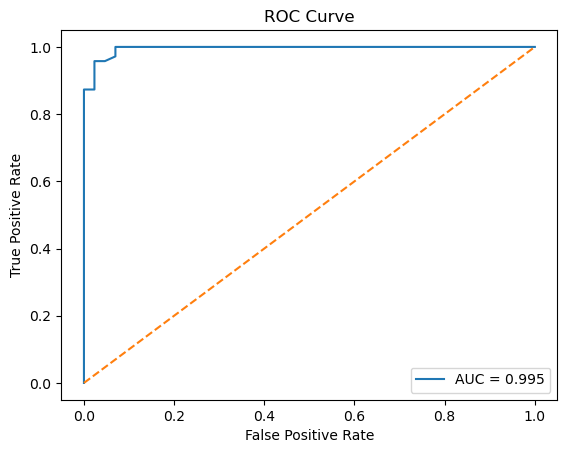

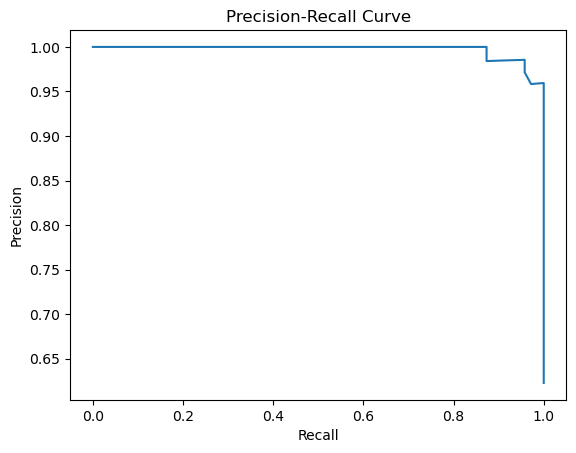


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [1]:
# Day 7 - Evaluation Metrics: ROC and Precision-Recall curve

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

# Load dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
Y = cancer.target

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Predict probabilities
Y_prob = model.predict_proba(X_test)[:,1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
auc = roc_auc_score(Y_test, Y_prob)

plt.plot(fpr, tpr, label="AUC = {:.3f}".format(auc))
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precisio-Recall curve
precision, recall, threshold = precision_recall_curve(Y_test, Y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(Y_test, model.predict(X_test)))